## Network Analysis
large number of interacting components - structure of these systems can be represented as networks.
    * network nodes = components
    * netword edges = interactions between the compnonets.
<p>
Can be used to study how pathogens, behaviors, and information spread in social networks, having important implications for understanding of epidemics and the planning of effective interventions. In biology- at the molecular level - can be applied to gene regulation networks, signal transduction networks, protein interaction networks and etc.
</p>
This proj - analyze some basic properties of social networks collected in different rural villages in India <br>
Network vs graph
    - Network - real world object such as a road network
    - graph - refers to its abstract mathematical representation a collection of nodes (vertices) edges (lines). Each edge corresponds to a pair of vertices. 
Two connected verticies - neighbors - <br>
path - sequence of unique verticies.  <br>
Goal - to find the shortest path - minimum number of steps to go from vertex a to b. <br>
Connected graph - every vertex is reachable from every other vertex - if there is a path from every vertex to every other vertex. <br>
Disconnected graph - connected components of edges and nodes - components not connected to eachother <br>
Size of a component = number of nodes in the component <br>
<br>
##### NetworkX module

In [13]:
import networkx as nx
%matplotlib inline

In [24]:
G = nx.Graph()
#empty graph

In [25]:
#add some nodes
G.add_node(1)
G.add_nodes_from([2,3])
G.add_nodes_from(["u", "v"])
G.nodes()

[1, 2, 3, 'u', 'v']

In [26]:
G.add_edge(1,2)
# add node labels as input arguments
G.add_edge("u", "v")
G.add_edges_from([(1,3),(1,4),(1,5),(1,6)])
# input argument is a list of tuples. each tuple corresponding to an edge
G.add_edge("u", "w")
# can add an edge even if the underlying nodes don't already exist as part of the graph
# python adds those nodes in automatically
G.edges()

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), ('u', 'w'), ('u', 'v')]

In [27]:
# remove node #2
G.remove_node(2)
# remove multiple nodes
G.remove_nodes_from([4,5])
G.nodes()

[1, 3, 6, 'u', 'w', 'v']

In [28]:
# remove edge (1,3)
G.remove_edge(1,3)
# remove multiple edges
G.remove_edges_from([(1,2), ("u","v")])
G.edges()

[(1, 6), ('u', 'w')]

In [29]:
print (G.number_of_nodes())
print (G.number_of_edges())

6
2


### Graph Visualization
NetworkX contains many types of random graph generators. Also a few empirical datasets <br>
<b> karate club graph </b> - nodes represent members of a karate club and the edges correspond to friendships between the members. <br>


In [31]:
K = nx.karate_club_graph()
import matplotlib.pyplot as plt

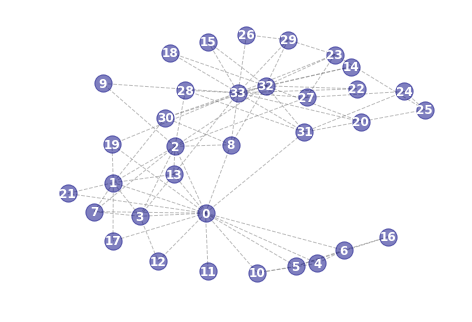

In [58]:
nx.draw(K, with_labels=True, node_color="navy", font_color="white", 
        font_weight="bold", alpha=0.5, edge_color="gray", 
        style="dashed")

https://matplotlib.org/api/cm_api.html

NetworkX stores the degree of nodes in a dictionary <br>
keys = node IDs <br>
values = associated degrees

In [36]:
K.degree()

{0: 16,
 1: 9,
 2: 10,
 3: 6,
 4: 3,
 5: 4,
 6: 4,
 7: 4,
 8: 5,
 9: 2,
 10: 3,
 11: 1,
 12: 2,
 13: 5,
 14: 2,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 3,
 20: 2,
 21: 2,
 22: 2,
 23: 5,
 24: 3,
 25: 3,
 26: 2,
 27: 4,
 28: 3,
 29: 4,
 30: 4,
 31: 6,
 32: 12,
 33: 17}

In [37]:
K.degree()[33]

17

In [38]:
K.degree(33)

17

In [40]:
K.degree(0) is K.degree()[0]

True

In [39]:
print (K.number_of_nodes())
print (K.number_of_edges())

34
78


### Random Graphs
can sample random numbers from a distribution like normal or binomial distribution, can sample random graphs. Different random graph models give rise to different kinds of graphs. <br>
Simplest random graph model - Erdos-Renyi (ER) model <br>
    - N - number of nodes in the graph
    - p - probability for any pair of nodes to be connected by an edge
Small p  = sparse graphs - few edges, large p = densely connected <br>
Writing own ER model

In [41]:
from scipy.stats import bernoulli
bernoulli.rvs(p=0.2)
# rvs method to generate one single realization
# input argument p - probability of success

0

https://networkx.github.io/documentation/development/_modules/networkx/drawing/nx_pylab.html <br>
https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html

Number of Nodes 20


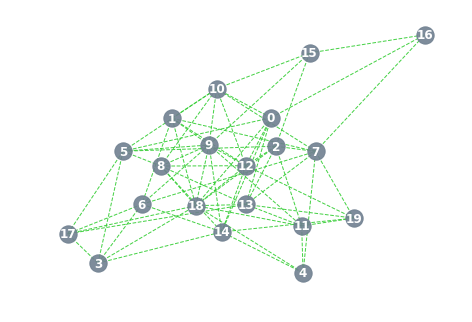

In [105]:
N = 20
p = 0.2

# create empty graph
# add all N nodes
# loop over all pairs of nodes
# add an edge with prob p
Q = nx.Graph()
Q.add_nodes_from(range(N))
for node1 in Q.nodes():
    for node2 in Q.nodes():
        if bernoulli.rvs(p=p) == True:
            # 0 is interpreted as False
            # 1 is interpeted as True
            Q.add_edge(node1, node2)
print "Number of Nodes",(Q.number_of_nodes())
nx.draw(Q, with_labels=True, node_color="slategrey", 
        font_color="white", font_weight="bold", alpha=0.9, 
        edge_color="limegreen", style="dashed") 

The network is too densly connected. Graph is undirected. It should consider each pair of nodes just one time. Need to impose an extra constraint such as node 1 less than node 2 or node 1 greater than node 2. 

Number of Nodes 20


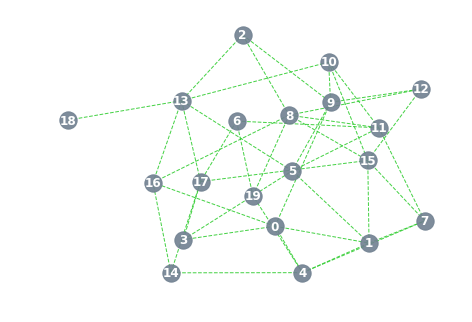

In [79]:
N = 20
p = 0.2

# create empty graph
# add all N nodes
# loop over all pairs of nodes
# add an edge with prob p
Q = nx.Graph()
Q.add_nodes_from(range(N))
for node1 in Q.nodes():
    for node2 in Q.nodes():
        if node1 < node2 and bernoulli.rvs(p=p) == True:
            # 0 is interpreted as False
            # 1 is interpeted as True
            Q.add_edge(node1, node2)
print "Number of Nodes",(Q.number_of_nodes())
nx.draw(Q, with_labels=True, node_color="slategrey", 
        font_color="white", font_weight="bold", alpha=0.9, 
        edge_color="limegreen", style="dashed")
#correct

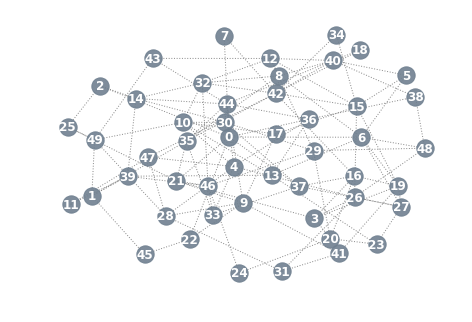

In [89]:
def er_graph(N, p):
    """generate an ER graph"""
    Q = nx.Graph()
    Q.add_nodes_from(range(N))
    for node1 in Q.nodes():
        for node2 in Q.nodes():
            if node1 < node2 and bernoulli.rvs(p=p) == True:
                # 0 is interpreted as False
                # 1 is interpeted as True
                Q.add_edge(node1, node2)
    return Q
# print "Number of Nodes",(Q.number_of_nodes())
nx.draw(er_graph(50, 0.08), with_labels=True, node_color="slategrey", 
        font_color="white", font_weight="bold", alpha=0.9, 
        edge_color="grey", style="dotted")

Number of Nodes 10


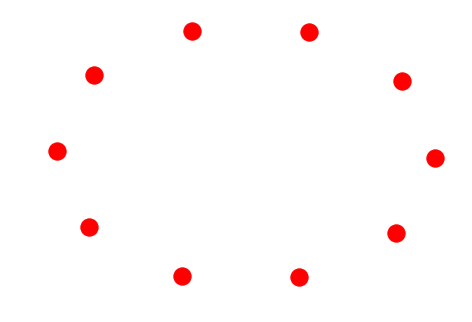

In [93]:
print "Number of Nodes",(er_graph(10,1).number_of_nodes())
nx.draw(er_graph(10,0))

Number of Nodes 10


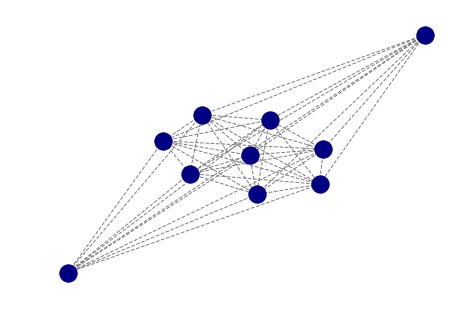

In [106]:
print "Number of Nodes",(er_graph(10,1).number_of_nodes())
nx.draw(er_graph(10,1), node_color="navy", font_color="white", 
        font_weight="bold", edge_color="gray", 
        style="dashed")
# nx.draw(er_graph(10,0), node_color="navy")

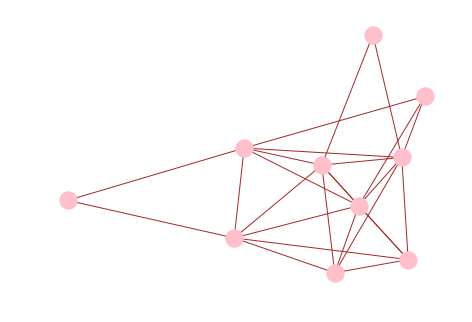

In [100]:
nx.draw(er_graph(10,0.5), node_color="pink", edge_color="brown")

#### Degree Distribution

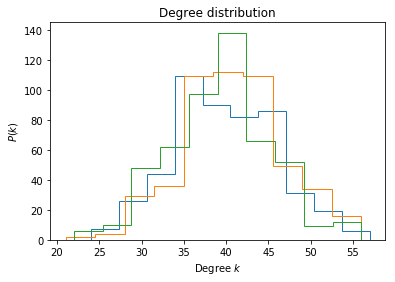

In [118]:
def plot_degree_distribution(Q):
    plt.hist(list(Q.degree().values()), histtype="step")
    #view object to the values
    plt.xlabel("Degree $k$")
    plt.ylabel("$P(k)$")
    plt.title("Degree distribution")

T = er_graph(500, 0.08)
plot_degree_distribution(T)
# plt.show()
# 500 nodes
# histogram of node connections
U = er_graph(500, 0.08)
plot_degree_distribution(U)
# plt.show()

V = er_graph(500, 0.08)
plot_degree_distribution(V)
plt.show()

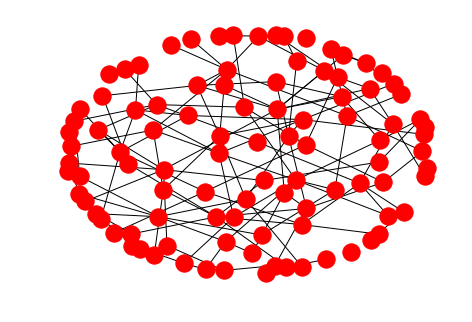

In [124]:
I = nx.erdos_renyi_graph(100, 0.03)
nx.draw(I)

(array([  5.,  20.,  31.,  16.,   0.,  11.,   9.,   4.,   3.,   1.]),
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ]),
 <a list of 1 Patch objects>)

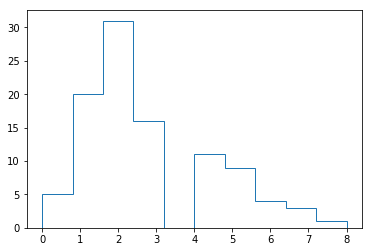

In [129]:
plt.hist(list(I.degree().values()), histtype="step")

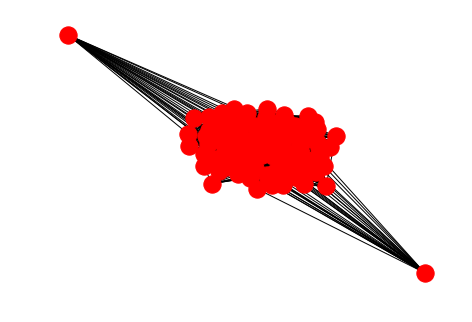

In [125]:
J = nx.erdos_renyi_graph(100, 0.30)
nx.draw(J)

(array([  4.,   4.,  12.,  20.,  19.,  15.,  17.,   6.,   1.,   2.]),
 array([ 18. ,  20.3,  22.6,  24.9,  27.2,  29.5,  31.8,  34.1,  36.4,
         38.7,  41. ]),
 <a list of 1 Patch objects>)

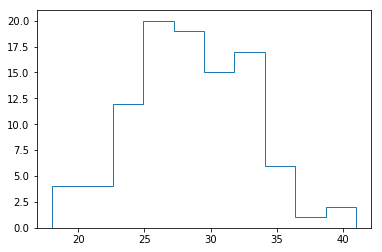

In [127]:
plt.hist(list(J.degree().values()), histtype="step")

#### Descriptive Statistics of Empirical Social Networks
Basic properties of social networks from two different rural Indian villages. Data from a study "The Diffusion of Micro-finance" in Journal of Science, 2013.  Census of households about relationships with others in the village. <br>
Adjacency matrix - n nodes by n matrix where entry ij i one if node i and node j have a tie, otherwise equal to 0. <br>
Graphs are undirected - a tie between nodes i and j can also be described as a tie between nodes j and i. = symmetric.  ij is the same is ji. Either both are 0 or 1.

In [134]:
import numpy as np
A1 = np.loadtxt("adj_allVillageRelationships_vilno_1.csv", delimiter=",")
A2 = np.loadtxt("adj_allVillageRelationships_vilno_2.csv", delimiter=",")
print (A1.shape)
print (A2.shape)

(843L, 843L)
(877L, 877L)


In [135]:
G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)

In [140]:
# count number of nodes and edges in teh networks
# number of edges per node = degree
def basic_net_stats(G):
    print ("number of nodes: ",G.number_of_nodes())
    print ("number of edges: ",G.number_of_edges())
    print ("Avg degree %.2f" % np.mean(list(G.degree().values())))tyv

In [141]:
print "G1",(basic_net_stats(G1))
print "G2",(basic_net_stats(G2))

G1 ('number of nodes: ', 843)
('number of edges: ', 3405)
Avg degree 8.08
None
G2 ('number of nodes: ', 877)
('number of edges: ', 3063)
Avg degree 6.99
None


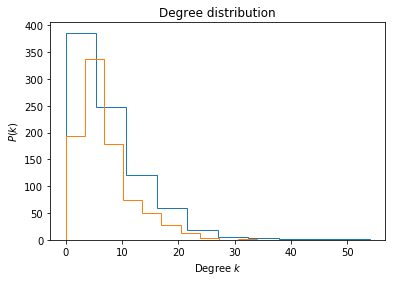

In [142]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)
plt.show()

#### Finding the Largest Connected Component
nx.connected connected component subgraphs

In [145]:
gen = nx.connected_component_subgraphs(G1)
g = gen.next()
# python 2 - gen.next()
# python 3 - gen__next__() 
type(g)

networkx.classes.graph.Graph

In [149]:
print (g.number_of_nodes())
print (len(gen.next()))
 # number of nodes in that object

825
4


In [151]:
print (len(G1))
print (G1.number_of_nodes())


843
843


In [155]:
G1_LCC = max(nx.connected_component_subgraphs(G1), key=len)
G2_LCC = max(nx.connected_component_subgraphs(G2), key=len)
print (len(G1_LCC))
print (len(G2_LCC))

825
810


In [161]:
G1_LCC.number_of_nodes() / float(G1.number_of_nodes())
# percent of nodes connected in the largest connected component

0.9786476868327402

In [163]:
G2_LCC.number_of_nodes() / float(G2.number_of_nodes())

0.9236031927023945

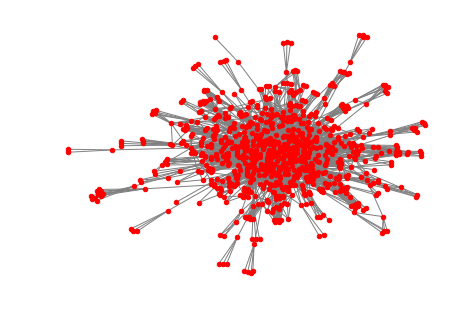

In [164]:
plt.figure()
nx.draw(G1_LCC, node_color="red", edge_color="grey", node_size=20)
plt.show()

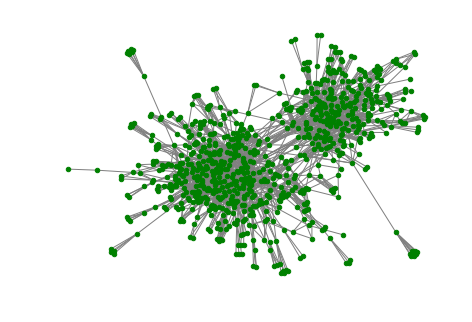

In [166]:
plt.figure()
nx.draw(G2_LCC, node_color="green", edge_color="grey", node_size=20)
plt.show()

Network Communities - community is a group of nodes that are densely connected to other nodes in the group but only sparsely connected nodes outside of that group